In [2]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_df = pd.read_csv('C:\\Users\\flore\\Desktop\\opensclass\\Projet 7\\train_df_less_features.csv')

In [4]:
train_df.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_ANNUITY,ANNUITY_INCOME_PERC,INSTAL_DBD_MEAN,REGION_POPULATION_RELATIVE,TARGET,prediction
0,100002,0.083037,0.262949,0.139376,0.060749,-9461,-637.0,0.067329,-3648.0,-2120,24700.5,0.121978,20.421053,0.018801,1.0,0.236506
1,100003,0.311267,0.622246,NaN,0.027598,-16765,-1188.0,0.070862,-1186.0,-291,35698.5,0.132217,7.160000,0.003541,0.0,0.072170
2,100004,NaN,0.555912,0.729567,0.050000,-19046,-225.0,0.011814,-4260.0,-2531,6750.0,0.100000,7.666667,0.010032,0.0,0.038389
3,100006,NaN,0.650442,NaN,0.094941,-19005,-3039.0,0.159905,-9833.0,-2437,29686.5,0.219900,19.375000,0.008019,0.0,0.056073
4,100007,NaN,0.322738,NaN,0.042623,-19932,-3038.0,0.152418,-4311.0,-3458,21865.5,0.179963,4.590909,0.028663,0.0,0.050111


In [5]:
# Creating columns of target values 0 and 1 for some values of the threshold that will determine if the prediction leads
# to a target value of 0 or 1

# Here giving target value 0 or 1 depending on if the prediction is above or equal to the threshold:
def update_column_Answer0005(row):
    if row['prediction'] <= 0.005:
        return 0
    else:
        return 1

# Applying the custom function to update the column for threshold 0.005
train_df['Answer_0.005'] = train_df.apply(update_column_Answer0005, axis=1)

# Same for threshold 0.0075
def update_column_Answer00075(row):
    if row['prediction'] <= 0.0075:
        return 0
    else:
        return 1
train_df['Answer_0.0075'] = train_df.apply(update_column_Answer00075, axis=1)

# Same for threshold 0.01
def update_column_Answer001(row):
    if row['prediction'] <= 0.01:
        return 0
    else:
        return 1
train_df['Answer_0.01'] = train_df.apply(update_column_Answer001, axis=1)

# Same for threshold 0.02
def update_column_Answer002(row):
    if row['prediction'] <= 0.02:
        return 0
    else:
        return 1
train_df['Answer_0.02'] = train_df.apply(update_column_Answer002, axis=1)

# Same for threshold 0.03
def update_column_Answer003(row):
    if row['prediction'] <= 0.03:
        return 0
    else:
        return 1
train_df['Answer_0.03'] = train_df.apply(update_column_Answer003, axis=1)

# Same for threshold 0.04
def update_column_Answer004(row):
    if row['prediction'] <= 0.04:
        return 0
    else:
        return 1
train_df['Answer_0.04'] = train_df.apply(update_column_Answer004, axis=1)


# Same for threshold 0.05
def update_column_Answer005(row):
    if row['prediction'] <= 0.05:
        return 0
    else:
        return 1
train_df['Answer_0.05'] = train_df.apply(update_column_Answer005, axis=1)

# Same for threshold 0.075
def update_column_Answer0075(row):
    if row['prediction'] <= 0.075:
        return 0
    else:
        return 1
train_df['Answer_0.075'] = train_df.apply(update_column_Answer0075, axis=1)


# Same for threshold 0.1
def update_column_Answer01(row):
    if row['prediction'] <= 0.1:
        return 0
    else:
        return 1
train_df['Answer_0.1'] = train_df.apply(update_column_Answer01, axis=1)

# Same for threshold 0.125
def update_column_Answer0125(row):
    if row['prediction'] <= 0.125:
        return 0
    else:
        return 1
train_df['Answer_0.125'] = train_df.apply(update_column_Answer0125, axis=1)

# Same for threshold 0.15
def update_column_Answer015(row):
    if row['prediction'] <= 0.15:
        return 0
    else:
        return 1
train_df['Answer_0.15'] = train_df.apply(update_column_Answer015, axis=1)

# Same for threshold 0.2
def update_column_Answer02(row):
    if row['prediction'] <= 0.2:
        return 0
    else:
        return 1
train_df['Answer_0.2'] = train_df.apply(update_column_Answer02, axis=1)

# Same for threshold 0.3
def update_column_Answer03(row):
    if row['prediction'] <= 0.3:
        return 0
    else:
        return 1
train_df['Answer_0.3'] = train_df.apply(update_column_Answer03, axis=1)

# Same for threshold 0.4
def update_column_Answer04(row):
    if row['prediction'] <= 0.4:
        return 0
    else:
        return 1
train_df['Answer_0.4'] = train_df.apply(update_column_Answer04, axis=1)

# Same for threshold 0.5
def update_column_Answer05(row):
    if row['prediction'] <= 0.5:
        return 0
    else:
        return 1
train_df['Answer_0.5'] = train_df.apply(update_column_Answer05, axis=1)

# Same for threshold 0.6
def update_column_Answer06(row):
    if row['prediction'] <= 0.6:
        return 0
    else:
        return 1
train_df['Answer_0.6'] = train_df.apply(update_column_Answer06, axis=1)

# Same for threshold 0.7
def update_column_Answer07(row):
    if row['prediction'] <= 0.7:
        return 0
    else:
        return 1
train_df['Answer_0.7'] = train_df.apply(update_column_Answer07, axis=1)

In [6]:
train_df.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,Answer_0.075,Answer_0.1,Answer_0.125,Answer_0.15,Answer_0.2,Answer_0.3,Answer_0.4,Answer_0.5,Answer_0.6,Answer_0.7
0,100002,0.083037,0.262949,0.139376,0.060749,-9461,-637.0,0.067329,-3648.0,-2120,...,1,1,1,1,1,0,0,0,0,0
1,100003,0.311267,0.622246,NaN,0.027598,-16765,-1188.0,0.070862,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0
2,100004,NaN,0.555912,0.729567,0.050000,-19046,-225.0,0.011814,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,NaN,0.650442,NaN,0.094941,-19005,-3039.0,0.159905,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,NaN,0.322738,NaN,0.042623,-19932,-3038.0,0.152418,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0


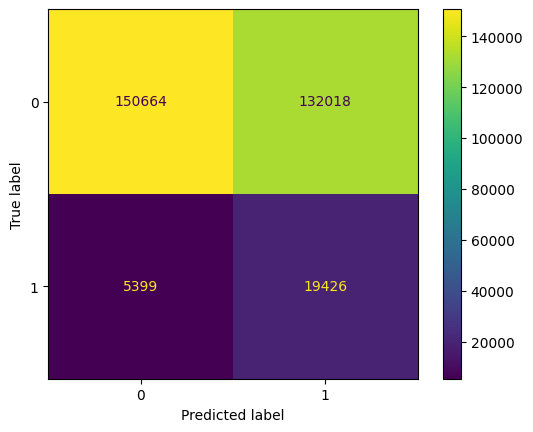

In [7]:
# Confusion matrix for one threshold
from sklearn import metrics
    
confusion_matrix = metrics.confusion_matrix(train_df['TARGET'], train_df['Answer_0.04'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Finding the threshold with the minimum cost

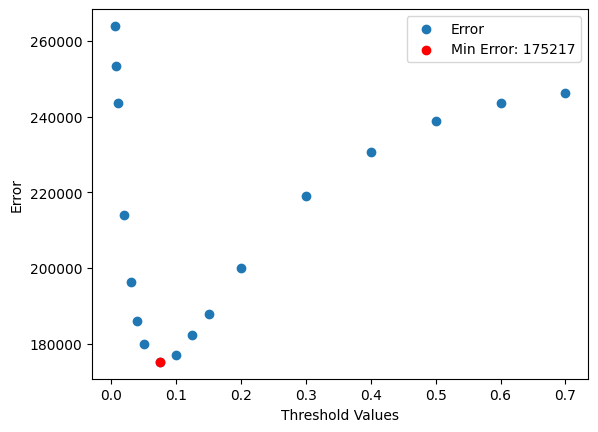

In [8]:
# Here we make a graph showing the cost for the company for each threshold as we estimate that the cost
# for a False Negative is 10 times the cost of a False Positive

liste1 = [0.005, 0.0075, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
error = []

# here is the part where we are adding the cost of false positives and false negatives
for i in liste1:
    confusion_matrix = metrics.confusion_matrix(train_df['TARGET'], train_df['Answer_' + str(i)])
    error.append(confusion_matrix[0][1] + 10 * (confusion_matrix[1][0]))
    
# Find the index of the minimum error value
min_error_index = error.index(min(error))

# Create a scatter plot
plt.scatter(liste1, error, label='Error')

# Highlight the minimum error point in red
plt.scatter(liste1[min_error_index], error[min_error_index], c='red', label=f'Min Error: {error[min_error_index]}', marker='o')

# Add labels and legend
plt.xlabel('Threshold Values')
plt.ylabel('Error')
plt.legend()

# Show the plot
plt.show()